# Paper - Example 3

## Initialization

In [1]:
# Import the pyKasso package
import pykasso as pk
import matplotlib.pyplot as plt
import numpy as np

# Create a pyKasso application
app = pk.pykasso()

# Declare the grid parameters
grid_parameters = {
    'x0': 2582750,
    'y0': 1127767,
    'z0': 1000,
    'nx': 394,
    'ny': 193,
    'nz': 100,
    'dx': 20,
    'dy': 20,
    'dz': 20,
}

# Declare the project parameters
app.new_project(project_name='example_03', grid_parameters=grid_parameters)
nx, ny, nz = app.model.grid.shape
app.visualizer.notebook = True
dr = pk.DataReader(grid=app.project.grid)
extent = app.project.grid.extent
input_dir = 'example_03/inputs/'

## Visualize and define the model variables

### Topography

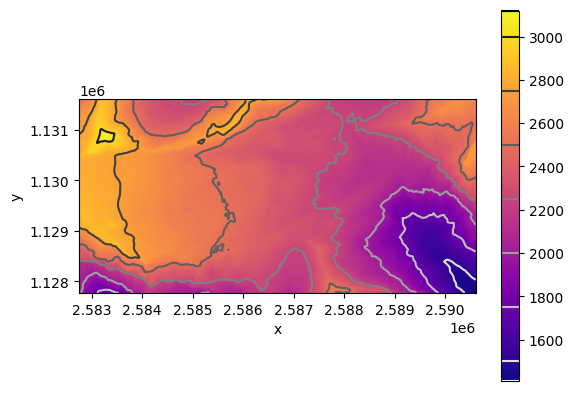

In [2]:
# Load
filename = input_dir + 'DEM.tif'
topography = dr.get_data_from_file(filename)

# Plot
imshow_options = {
    'extent' : extent,
    'cmap' : 'plasma'
}
contour_options = {
    'cmap' : 'binary'
}
fig = app.visualizer.mpl_plot_array_2D(topography,
                                       imshow_options=imshow_options,
                                       contour_options=contour_options)
fig.fig.savefig('fig\example_03_topography')

### Bedrock

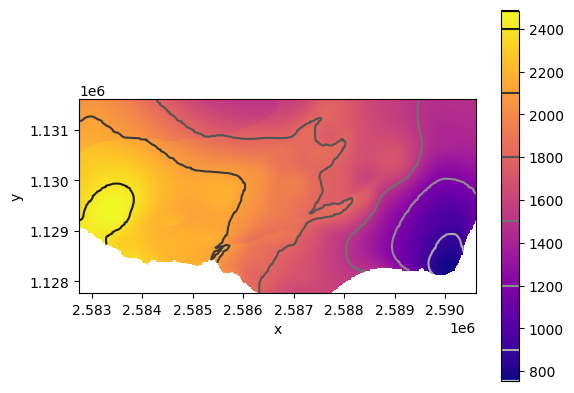

In [3]:
# Load
filename = input_dir + 'Bot_urgonien.tif'
bedrock = dr.get_data_from_file(filename)
bedrock = bedrock - 300
bedrock[bedrock < 0] = np.nan

# Plot
imshow_options = {
    'extent' : extent,
    'cmap' : 'plasma'
}
contour_options = {
    'cmap' : 'binary',
    'levels' : [i*300 for i in range(10)]
}
fig = app.visualizer.mpl_plot_array_2D(bedrock,
                                 imshow_options=imshow_options,
                                 contour_options=contour_options)
fig.fig.savefig('fig\example_03_bedrock')

### Geologic model

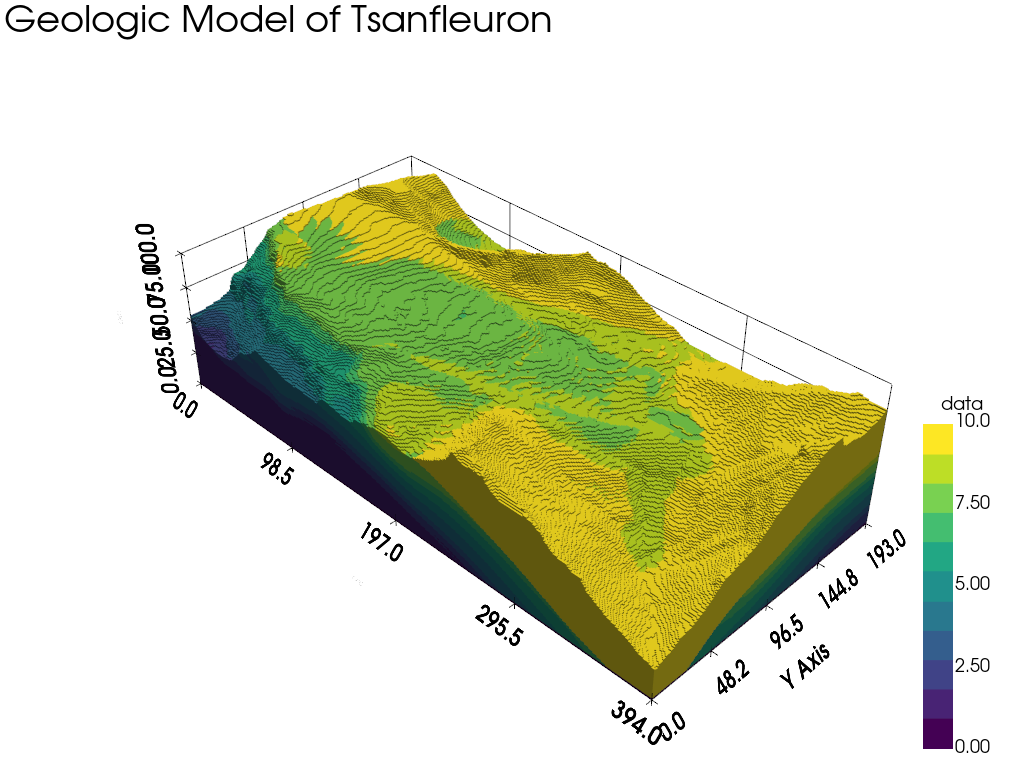

In [4]:
# Load
filename = input_dir + 'tsanfleuron_20m_XYZ.vox'
df = dr.get_dataframe_from_file(filename)
df['X'] = df['X'] + 2000000 - 10
df['Y'] = df['Y'] + 1000000 - 10 
geology = dr._get_data_from_vox_df(df)

# Set names
geology_names = {
    -9999: 'Out',
    0: None,
    1: 'UHNappe',
    2: 'Dogger',
    3: 'Malm',
    4: 'Berriasian',
    5: 'LateBerriasianValanginian',
    6: 'Hauterivian',
    7: 'EarlyBarremian',
    8: 'Urgonian',
    9: 'Eocene',
    10: 'Wildhorn',
}

# Set costs
geology_costs = {
    8: 0.4,
    9: 0.4,
}

# Set model
geology_model = {
    -9999: False,
    0: False,
    1: False,
    2: False,
    3: False,
    4: False,
    5: False,
    6: False,
    7: False,
    8: True,
    9: True,
    10: False,
}

# Plot
text_options = {
    'text' : 'Geologic Model of Tsanfleuron'
}
scalar_bar_args = {
    'vertical' : True,
}
fig = app.visualizer.pv_plot_array(geology,
                                   mask_values=[-9999],
                                   cpos=[1,-1,1],
                                   text_options=text_options,
                                   scalar_bar_args=scalar_bar_args,
                                   discrete_scalar_bar=True,
                                   savefig='fig\example_03_geologic_model',
                                   )

### Faults model

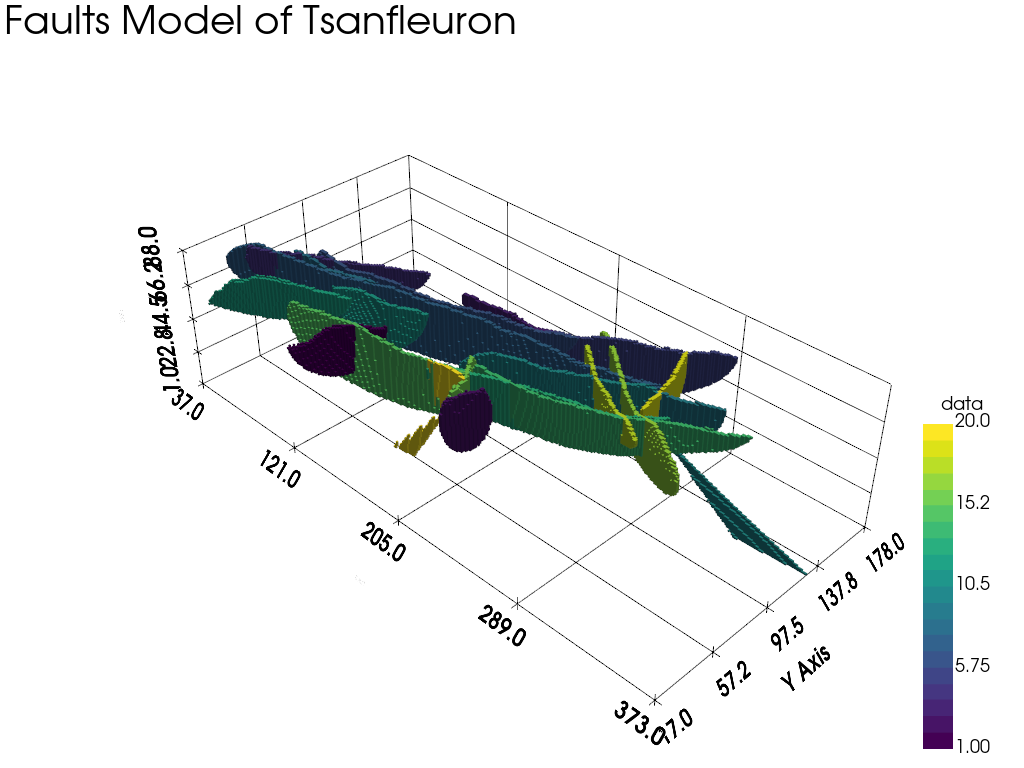

In [5]:
# Load
filename = input_dir + 'faults.npy'
faults = dr.get_data_from_file(filename)

# Set names
faults_ids = list(range(21))
faults_names_ = ['Chevauchement', 'NEESOO1', 'NEESOO2', 'NESO1', 'NESO11',
                 'NESO2', 'NESO22', 'NESO3', 'NESO32', 'NESO4', 'NESO42',
                 'NESO43', 'NESO44', 'NESO5', 'NESO6', 'NESO7', 'NOOSEE1',
                 'NOOSEE2', 'NOOSEE3', 'NS2', 'OE1']
faults_names = {faults_id: faults_name for (faults_id, faults_name) in zip(faults_ids, faults_names_)}

# Plot
text_options = {
    'text' : 'Faults Model of Tsanfleuron'
}
scalar_bar_args = {
    'vertical' : True,
}
fig = app.visualizer.pv_plot_array(faults,
                                   mask_values=[0],
                                   cpos=[1,-1,1],
                                   text_options=text_options,
                                   scalar_bar_args=scalar_bar_args,
                                   discrete_scalar_bar=True,
                                   savefig='fig\example_03_faults_model',
                                   )

### Outlets

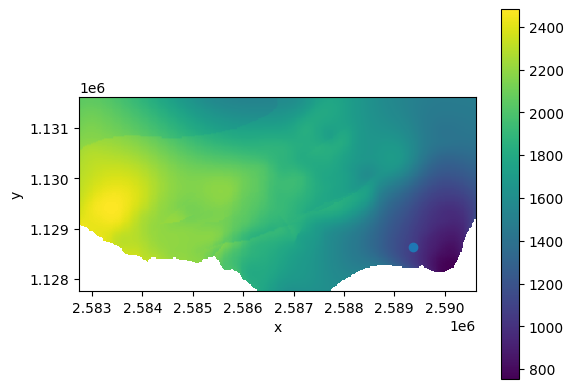

In [6]:
# Load
fname = input_dir + 'Outlet_ModeleG.txt'
outlet = dr.get_data_from_file(fname)
outlet[0] = outlet[0] - 300

# Plot
x, y = outlet
app.visualizer.mpl_plot_array_2D(bedrock, imshow_options={'extent':extent})
plt.scatter(x,y)

### Water table

In [7]:
i, j = app.model.grid.get_indices(outlet)
level = topography[i, j]
water_table = np.full((nx, ny), level)
level

array([1686.1437], dtype=float32)

## Gradient

In [8]:
# # Load
# fname = input_dir + 'tsanfleuron_20m_Gradients_XYZ.vox'
# df = dr.get_dataframe_from_file(fname, nrows=10)
# df

# grad_X = df[['X', 'Y', 'Z', 'vx']]
# grad_Y = df[['X', 'Y', 'Z', 'vy']]
# grad_Z = df[['X', 'Y', 'Z', 'vz']]
# grad_X = dr._get_data_from_vox_df(grad_X)
# grad_X

## Set the model

In [9]:
# Declare the model parameters
model_parameters = {
    'sks' : {
        'algorithm' : 'Riemann3',
        'mode' : 'D',
        # 'factors' : {
        #     'F' : 33,
        #     'F1' : 10,
        #     'F2' : 20,
        # },
        'costs': {
            'ratio' : 0.1,
        }
    },
    'domain' : {
        'topography' : 'DEM.tif',
        'bedrock': bedrock,
        'water_table' : water_table,
    },
    'outlets' : {
        'data' : outlet,
        'number' : 1,
        'importance': [1],
        'subdomain' : 'domain_surface', 
    },
    'inlets' : {
        'data' : 'Inlets_ModeleG.txt',
        'number': 22,
        'importance': [1, 1, 2],
        'per_outlet': [1],
    },
    'geology' : {
        'data' : geology,
        'names' : geology_names,
        'costs' : geology_costs,
        'model' : geology_model,
    },
    'faults' : {
        'data' : faults,
        'names' : faults_names,
    },
    'fractures' : {
        # 'seed': 111111,
        'generate': {
            'family_01': {
                'alpha'        : 1.4,
                'density'      : 4.5e-4,
                'orientation'  : [32, 86],
                'dip'          : 90,
                'length'       : [20, 400],
            },
            'family_02': {
                'alpha'        : 1.2,
                'density'      : 1.2e-4,
                'orientation'  : [146, 196],
                'dip'          : 90,
                'length'       : [20, 130],
            },
            'family_03': {
                'alpha'        : 2.1,
                'density'      : 4.5e-4,
                'orientation'  : [98, 163],
                'dip'          : 90,
                'length'       : [20, 740],
            },
            'family_04': {
                'alpha'        : 1.8,
                'density'      : 2.8e-4,
                'orientation'  : [72, 115],
                'dip'          : 90,
                'length'       : [20, 160],
            }
        }
    }
}

In [10]:
# Compute 10 simulations
for i in range(1):
    model_parameters['sks']['seed'] = i
    # app.model.model_parameters = model_parameters
    # app.model._initialize()
    # app.model._build()
    app.model.generate(model_parameters=model_parameters)

C:\Users\franc\OneDrive\Desktop\pykasso\pykasso\pykasso\model\geologic_features.py:245: RuntimeWarning: invalid value encountered in cast
  values = values.astype('int')
C:\Users\franc\OneDrive\Desktop\pykasso\pykasso\pykasso\core\grid.py:436: RuntimeWarning: invalid value encountered in cast
  k = k.astype('int32')


1
<class 'list'>
[[2589373.43, 1128641.0]]
22
<class 'list'>
[[2588000.0, 1129900.0], [2587500.0, 1129100.0], [2584400.0, 1129400.0], [2583786.0, 1128813.0], [2585270.0, 1129250.0], [2587320.0, 1129295.0], [2583700.0, 1128750.0], [2588000.0, 1131230.0], [2588450.0, 1130180.0], [2583380.0, 1128850.0], [2585019.0, 1130319.0], [2584597.0, 1129773.0], [2585900.0, 1130550.0], [2585470.0, 1130430.0], [2583300.0, 1129220.0], [2583600.0, 1130200.0], [2584030.0, 1129680.0], [2589050.0, 1130150.0], [2589130.0, 1130225.0], [2589200.0, 1130100.0], [2589570.0, 1129080.0], [2589350.0, 1129350.0]]


In [ ]:
app.model.conceptual_model_table

In [ ]:
app.model.geology.overview()

In [ ]:
app.model.faults.overview()

In [ ]:
app.model.fractures.overview()

## Geologic model

In [ ]:
imshow_options = {'cmap': 'binary'}

In [ ]:
# Plot the faults model
f01 = app.visualizer.mpl_plot_2D(feature='faults',
                                 imshow_options=imshow_options,
                                 )
f01.fig.savefig('fig/example_03_faults')

In [ ]:
# Plot the fracturation model
f02 = app.visualizer.mpl_plot_2D(feature='fractures',
                                 imshow_options=imshow_options,
                                 )
f02.fig.savefig('fig/example_03_fractures')

In [ ]:
# Plot the topography
f03 = app.visualizer.mpl_plot_2D(feature='time',
                                 imshow_options=imshow_options,
                                #  scatter_inlets_options={},
                                #  scatter_outlets_options={},
                                 )
f03.fig.savefig('fig/example_03_time')

## Fracturation analysis

In [ ]:
fractures = app.model.fractures.fractures
families = app.model.fractures.families

hist_settings = {
    'by' : 'family_id',
    'bins' : 10,
    'layout' : (2,2),
    'density' : True
}

In [ ]:
# Radius
axes = fractures.plot.hist(column='radius', logy=True, logx=True, **hist_settings)
plt.subplots_adjust(hspace=0.35, wspace=0.35)


In [ ]:
# Orientation
fractures.plot.hist(column='orientation', **hist_settings)

In [ ]:
# Dip
fractures.plot.hist(column='dip', **hist_settings)

## Results in 2D

In [ ]:
imshow_options = {'cmap': 'binary'}

In [ ]:
# Plot the last simulated karstic conduit network
f04 = app.visualizer.mpl_plot_karstic_network()
f04.fig.savefig('fig/example_03_karst')

In [ ]:
# Plot the cost array
f05 = app.visualizer.mpl_plot_2D(feature='cost',
                                 n_slice=50,
                                 imshow_options=imshow_options,
                                 )
f05.fig.savefig('fig/example_03_cost')
f05.fig

In [ ]:
# Plot the time travel array
f06 = app.visualizer.mpl_plot_2D(feature='time',
                                 n_slice=50,
                                 imshow_options=imshow_options,
                                 contour_options={},
                                 )
f06.fig.savefig('fig/example_03_time')
f06.fig

In [ ]:
# Compute the mean of all the simulated karstic networks
# mean = app.analyzer.compute_stats_on_networks('mean')
# extent = app.project.grid.extent
# imshow_options = {
#     'extent' : extent,
#     'cmap' : 'binary',
#     'vmin' : 0,
#     'vmax' : 0.1
# }
# settings = {
#     'ghost_values' : [0],}
# im05 = app.visualizer.mpl_plot_array_2D(mean, imshow_options=imshow_options)
# im05 = app.visualizer.pv_plot_array(mean, [0])#, imshow_options=imshow_options)
# im05.savefig('fig/example_03_mean_karstic_network')
# im05

In [ ]:
df = app.analyzer.compute_metrics()
app.analyzer.compare_metrics(df)

## Results in 3D

In [ ]:
settings = {
    # 'text_options' : {
    # #     'text': '',
    # #     'position': 'upper_left',
    # #     'font_size': 18,
    # #     'color': None,
    # #     'font': None,
    # #     'shadow': False,
    # #     'name': None,
    # #     'viewport': False,
    # #     'orientation': 0.0
    # },
    # 'n_iteration' : -1,
    # 'ghost_values' : [10, 0.4],
    'ghost_values' : [0,2,3,4,5,6,7,10, -9999],
    # 'ghost_values' : [10, 0.4],
    # # 'ghost_subdomains' : ['domain_surface'],
    # 'show_grid' : False,
    # 'show_outline': True,
    # 'data_options': {},
    # 'threshold_options' : {
    #     'value' : [8,9]
    # },
    'surfaces_options' : {
        'bedrock' : {},
        'topography' : {},
        # 'water_table' : {}
    },
    'show_scalar_bar' : False,
    # 'inlets_options' : {},
    # 'outlets_options' : {},
    # # 'show_slice' : True,
    # 'show_colorbar' : True
    # 'fractures_options': {
    #     # 'family_id': [2,3],
        # 'max_number': 50,
    # },
}

In [ ]:
# last_sims = app.project.get_last_simulations(9)
# app.visualizer.pv_show(simulations=last_sims,
#                        features=['karst'],
#                        settings=settings)

In [ ]:
app.visualizer.pv_show(simulations=[-1],
                       features=['karst'],
                       settings=settings,
                       cpos = [1,-1,1])

In [ ]:
plotter = app.visualizer.pv_show(simulations=[-1],
                                 features=['karst'],
                                 settings=settings,
                                 cpos=[1, -1, 1],
                                 return_plotter=True,
                                 )
plotter.export_html('example_03.html')